In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

In [3]:
input_file = 'Dataset/airlines_delay.csv'

In [4]:
data = pd.read_csv(input_file, index_col='Flight')

In [5]:
data.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0


In [6]:
airport_encoding = dict((j,i) for i,j in enumerate(set(data['AirportFrom']).union(set(data['AirportTo']))))

In [7]:
airport_encoding

{'LWB': 0,
 'IPL': 1,
 'AVP': 2,
 'BTM': 3,
 'OTZ': 4,
 'PSC': 5,
 'SNA': 6,
 'GFK': 7,
 'IYK': 8,
 'GRR': 9,
 'FLL': 10,
 'FLO': 11,
 'HOU': 12,
 'ORD': 13,
 'KTN': 14,
 'HPN': 15,
 'BGM': 16,
 'BOI': 17,
 'CPR': 18,
 'IDA': 19,
 'SGU': 20,
 'SPS': 21,
 'SMF': 22,
 'BFL': 23,
 'TRI': 24,
 'SJT': 25,
 'CMI': 26,
 'SHV': 27,
 'MEI': 28,
 'MKE': 29,
 'PSP': 30,
 'WRG': 31,
 'JAN': 32,
 'AZO': 33,
 'PWM': 34,
 'OGG': 35,
 'GSO': 36,
 'BOS': 37,
 'FSM': 38,
 'COS': 39,
 'BDL': 40,
 'FWA': 41,
 'MIA': 42,
 'TXK': 43,
 'ABR': 44,
 'EVV': 45,
 'OKC': 46,
 'SFO': 47,
 'MYR': 48,
 'ERI': 49,
 'LRD': 50,
 'CLD': 51,
 'LCH': 52,
 'MRY': 53,
 'LEX': 54,
 'MHT': 55,
 'DEN': 56,
 'MEM': 57,
 'MFR': 58,
 'BWI': 59,
 'CLT': 60,
 'SBA': 61,
 'LYH': 62,
 'KOA': 63,
 'FAI': 64,
 'PHF': 65,
 'JAC': 66,
 'CLE': 67,
 'CMX': 68,
 'BIL': 69,
 'JAX': 70,
 'SAF': 71,
 'MSP': 72,
 'FAR': 73,
 'TEX': 74,
 'MLB': 75,
 'STT': 76,
 'BQN': 77,
 'OAK': 78,
 'STL': 79,
 'ROW': 80,
 'RDU': 81,
 'GUC': 82,
 'ORF': 83,
 '

In [8]:
airline_encoding = dict((j,i) for i,j in enumerate(set(data['Airline'])))

In [9]:
airline_encoding

{'UA': 0,
 'EV': 1,
 'WN': 2,
 'HA': 3,
 'DL': 4,
 '9E': 5,
 'OH': 6,
 'AA': 7,
 'XE': 8,
 'FL': 9,
 'CO': 10,
 'B6': 11,
 'YV': 12,
 'MQ': 13,
 'AS': 14,
 'F9': 15,
 'OO': 16,
 'US': 17}

In [10]:
data['AirportFrom'] = data['AirportFrom'].map(airport_encoding)
data['AirportTo'] = data['AirportTo'].map(airport_encoding)

In [11]:
data

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,187,12,1,0
6948.0,360.0,146.0,OO,39,13,4,0
1247.0,1170.0,143.0,B6,37,60,3,0
31.0,1410.0,344.0,US,35,103,6,0
563.0,692.0,98.0,FL,124,187,4,0
...,...,...,...,...,...,...,...
6973.0,530.0,72.0,OO,106,215,5,1
1264.0,560.0,115.0,WN,125,56,4,1
5209.0,827.0,74.0,EV,192,187,2,1


In [12]:
data['Airline'] = data['Airline'].map(airline_encoding)

In [13]:
data.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,4,187,12,1,0
6948.0,360.0,146.0,16,39,13,4,0
1247.0,1170.0,143.0,11,37,60,3,0
31.0,1410.0,344.0,17,35,103,6,0
563.0,692.0,98.0,9,124,187,4,0


In [14]:
y = data['Class']

In [15]:
y

Flight
2313.0    0
6948.0    0
1247.0    0
31.0      0
563.0     0
         ..
6973.0    1
1264.0    1
5209.0    1
607.0     1
6377.0    1
Name: Class, Length: 539382, dtype: int64

In [16]:
data.drop('Class', axis=1, inplace=True)

In [17]:
data.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek
Flight,,,,,,
2313.0,1296.0,141.0,4,187,12,1
6948.0,360.0,146.0,16,39,13,4
1247.0,1170.0,143.0,11,37,60,3
31.0,1410.0,344.0,17,35,103,6
563.0,692.0,98.0,9,124,187,4


In [18]:
from sklearn.model_selection import train_test_split

<BarContainer object of 2 artists>

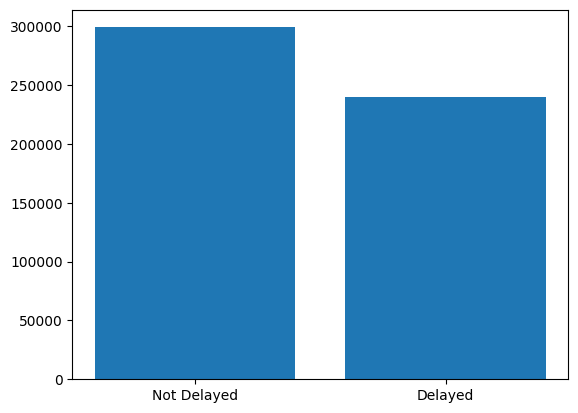

In [19]:
from collections import Counter
counter = Counter(y)
import matplotlib.pyplot as plt
plt.bar(['Not Delayed', 'Delayed'], counter.values())

In [20]:
train_x, test_x, train_y, test_y = train_test_split(data, y)

In [21]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(404536, 6) (134846, 6) (404536,) (134846,)


In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
nn = MLPClassifier()

In [24]:
nn.fit(train_x, train_y)

MLPClassifier()

In [25]:
predicted = nn.predict(test_x)

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [27]:
f1_score(predicted, test_y)

0.4805570589949623

In [28]:
recall_score(predicted, test_y)

0.6452108778892647

In [29]:
precision_score(predicted, test_y)

0.38285486840141303

In [30]:
accuracy_score(predicted, test_y)

0.6299037420464827